In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


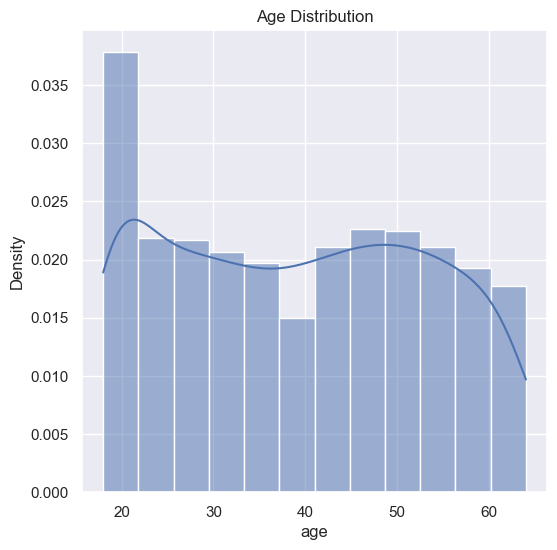

In [7]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(df['age'],kde=True,stat="density")
plt.title('Age Distribution')
plt.show()

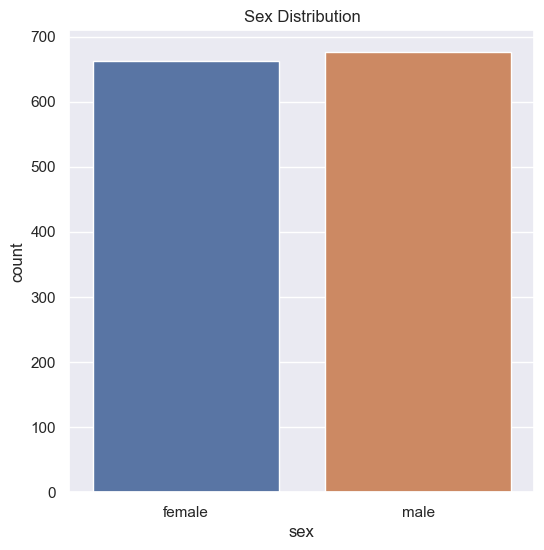

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df ,hue="sex")
plt.title('Sex Distribution')
plt.show()

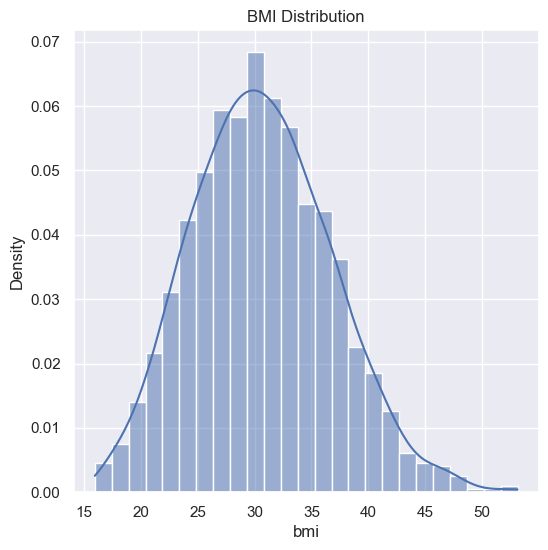

In [9]:
plt.figure(figsize=(6,6))
sns.histplot(df['bmi'],kde=True,stat="density")
plt.title('BMI Distribution')
plt.show()

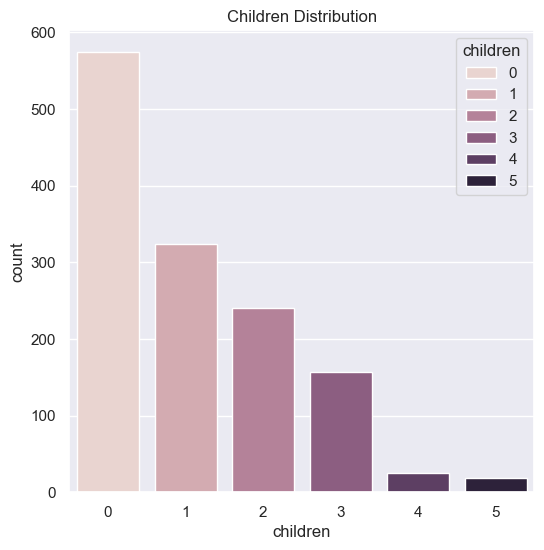

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df,hue="children")
plt.title('Children Distribution')
plt.show()

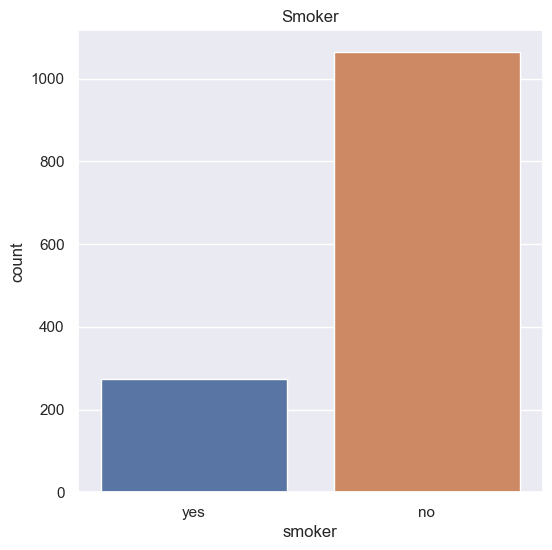

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df,hue="smoker")
plt.title('Smoker')
plt.show()

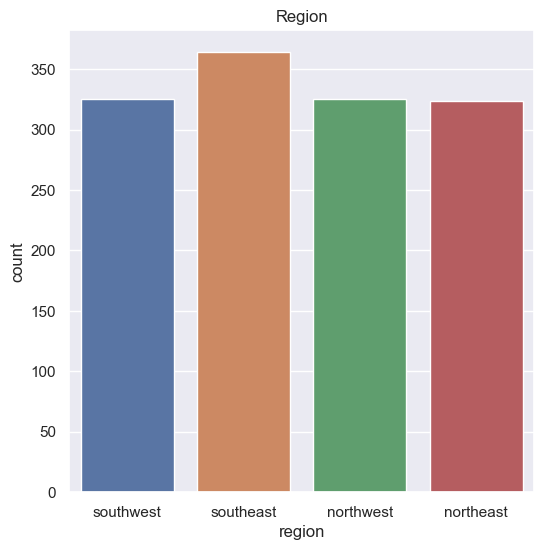

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df,hue="region")
plt.title('Region')
plt.show()

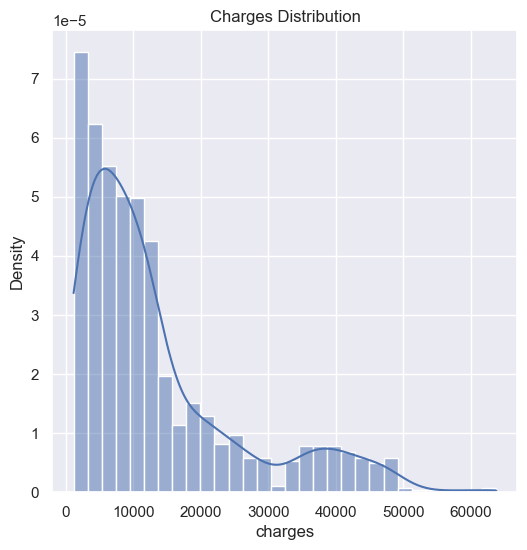

In [13]:
plt.figure(figsize=(6,6))
sns.histplot(df['charges'],kde=True,stat="density")
plt.title('Charges Distribution')
plt.show()

In [15]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [16]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [17]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [19]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
pd.set_option('future.no_silent_downcasting', True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
pd.set_option('future.no_silent_downcasting', True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
pd.set_option('future.no_silent_downcasting', True)

In [20]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [21]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
model=LinearRegression()

In [24]:
model.fit(x_train,y_train)

LinearRegression()

In [25]:
y_predict1=model.predict(x_train)
train_r2=metrics.r2_score(y_train,y_predict1)
print('R2:',train_r2)

R2: 0.751505643411174


In [26]:
y_predict=model.predict(x_test)
test_r2=metrics.r2_score(y_test,y_predict)
print('R2:',test_r2)

R2: 0.7447273869684077


In [27]:
input_data = (31,1,25.74,0,1,0)
input_data_df = pd.DataFrame([input_data],columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
prediction =model.predict(input_data_df)
print(prediction)
print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496048
